In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt

In [50]:
labels=['patient ID', 'Malignant/Benign', 'radius (mean)', 'radius (stderr)', 'radius (worst)', 'texture (mean)', 'texture (stderr)', 'texture (worst)', 'perimeter (mean)', 'perimeter (stderr)', 'perimeter (worst)', 'area (mean)', 'area (stderr)', 'area (worst)', 'smoothness (mean)', 'smoothness (stderr)', 'smoothness (worst)', 'compactness (mean)', 'compactness (stderr)', 'compactness (worst)', 'concavity (mean)', 'concavity (stderr)', 'concavity (worst)', 'concave points (mean)', 'concave points (stderr)', 'concave points (worst)', 'symmetry (mean)', 'symmetry (stderr)', 'symmetry (worst)', 'fractal dimension (mean)', 'fractal dimension (stderr)', 'fractal dimension (worst)']
tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat",header=None, names=labels)

In [3]:
tumor_data

,patient ID,Malignant/Benign,radius (mean),radius (stderr),radius (worst),texture (mean),texture (stderr),texture (worst),perimeter (mean),perimeter (stderr),...,concavity (worst),concave points (mean),concave points (stderr),concave points (worst),symmetry (mean),symmetry (stderr),symmetry (worst),fractal dimension (mean),fractal dimension (stderr),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,891923,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
296,891936,B,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
297,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676


#### 1

Text(0.5, 1.0, 'number of radius')

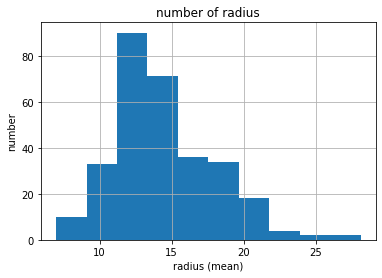

In [15]:
user_column='radius (mean)'
tumor_data[user_column].hist()
plt.xlabel('radius (mean)')
plt.ylabel('number')
plt.title('number of radius')

#### 2

In [22]:
A=np.array([[2,200],[4,500],[5,300]])
b=np.array([200,400,200])

In [23]:
la.solve(A.T@A,(A.T)@b)

array([-15.87301587,   0.95238095])

In [25]:
la.lstsq(A,b,rcond=None)

(array([-15.87301587,   0.95238095]),
 array([1904.76190476]),
 2,
 array([616.4738655 ,   2.23005838]))

In [26]:
2*-15.87301587+200*0.95238095

158.73015826

#### 3

In [4]:
b=tumor_data[['Malignant/Benign']].copy()
b[b['Malignant/Benign']=='M']=1
b[b['Malignant/Benign']=='B']=-1
b=np.array(b).reshape(300,).astype(float)

#### 4

In [51]:
subset_labels=['area (mean)', 'radius (stderr)', 'concavity (worst)', 'area (stderr)']

In [57]:
A_linear=np.array(tumor_data[subset_labels])

In [60]:
A_linear.shape

(300, 4)

#### 5

In [59]:
length=tumor_data.shape[0]
n=len(subset_labels)
A_quad=A_linear.copy()
for i in range(n):
    t=(np.array(tumor_data[subset_labels[i]])**2).reshape(length,1)
    A_quad=np.hstack((A_quad,t))
for i in range(n-1):
    for j in range(i+1,n):
        t=(np.array(tumor_data[subset_labels[i]])*np.array(tumor_data[subset_labels[j]])).reshape(length,1)
        A_quad=np.hstack((A_quad,t))

In [29]:
A_quad.shape

(300, 14)

#### 6

In [52]:
weights_linear=la.solve(A_linear.T@A_linear,(A_linear.T)@b)
weights_quad=la.solve(A_quad.T@A_quad,(A_quad.T)@b)

In [54]:
weights_linear

array([-3.12543986e+01,  1.22848653e-02,  9.08517055e-02,  4.88695776e-01])

In [42]:
p_lin=A_linear@weights_linear
p_lin[p_lin>0]=1
p_lin[p_lin<=0]=-1

In [43]:
p_quad=A_quad@weights_quad
p_quad[p_quad>0]=1
p_quad[p_quad<=0]=-1

In [39]:
d_lin=p_lin-b
d_quad=p_quad-b
fp_linear=len(d_lin[d_lin==2])
fn_linear=len(d_lin[d_lin==-2])
fp_quad=len(d_quad[d_quad==2])
fn_quad=len(d_quad[d_quad==-2])

In [62]:
p_quad.shape

(300,)